In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
#import necessary liabrarys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#load the dataset
url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'

df = pd.read_csv(url_dados, compression = 'zip')

In [4]:
df.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [5]:
df.shape

(23814, 877)

In [6]:
df['tratamento'].unique()

array(['com_droga', 'com_controle'], dtype=object)

In [7]:
df['tratamento'].value_counts()

com_droga       21948
com_controle     1866
Name: tratamento, dtype: int64

In [8]:
df['tratamento'].value_counts(normalize = True)

com_droga       0.921643
com_controle    0.078357
Name: tratamento, dtype: float64

In [9]:
df['tempo'].unique()

array([24, 72, 48])

In [10]:
df['tempo'].value_counts()

48    8250
72    7792
24    7772
Name: tempo, dtype: int64

In [11]:
df['tempo'].value_counts(normalize = True)

48    0.346435
72    0.327202
24    0.326363
Name: tempo, dtype: float64

In [12]:
df['dose'].unique()

array(['D1', 'D2'], dtype=object)

In [13]:
df['dose'].value_counts()

D1    12147
D2    11667
Name: dose, dtype: int64

In [14]:
df['dose'].value_counts(normalize = True)

D1    0.510078
D2    0.489922
Name: dose, dtype: float64

In [15]:
df['droga'].unique()

array(['b68db1d53', 'df89a8e5a', '18bb41b2c', ..., '573c787a2',
       'b2fe3eca7', 'dd4a96d16'], dtype=object)

In [16]:
df['g-0'].unique()

array([ 1.062 ,  0.0743,  0.628 , ...,  0.3942,  0.666 , -0.8598])

<AxesSubplot:ylabel='tratamento'>

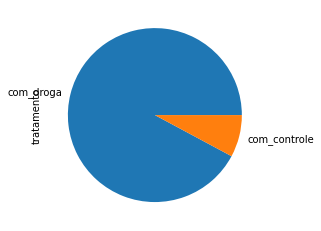

In [17]:
df['tratamento'].value_counts().plot.pie()

<AxesSubplot:ylabel='tempo'>

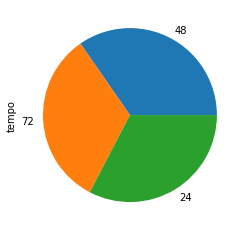

In [18]:
df['tempo'].value_counts().plot.pie()

<AxesSubplot:>

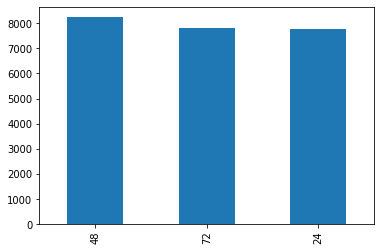

In [19]:
df['tempo'].value_counts().plot.bar()

In [20]:
dados_filtrados = df[df['g-0'] > 0]
dados_filtrados.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
6,id_001bd861f,com_droga,24,D2,746ca1f5a,2.0440,1.7000,-1.5390,5.9440,-2.1670,...,0.1855,1.1720,0.8325,0.6486,0.8090,1.5880,2.4670,0.0357,0.1351,-0.3179
7,id_0020d0484,com_droga,48,D1,8b87a7a83,0.2711,0.5133,-0.1327,2.5950,0.6980,...,0.3230,-0.4140,0.2532,0.0513,0.8600,1.4250,0.6633,0.4562,-0.9622,0.0260


# **Challenge 01: Investigate why the treatment class is so unbalanced?**

In [21]:
print(f'Total de linhas: {df.shape[0]}\nTotal de colunas: {df.shape[1]}')

Total de linhas: 23814
Total de colunas: 877


In [22]:
df['tratamento'].value_counts()

com_droga       21948
com_controle     1866
Name: tratamento, dtype: int64

<AxesSubplot:xlabel='count', ylabel='tratamento'>

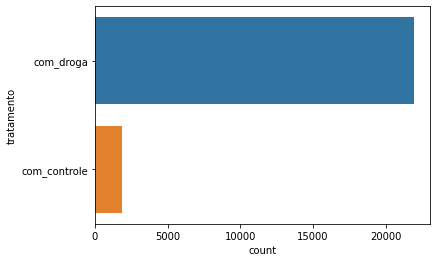

In [23]:
y = df['tratamento']
sns.countplot(y = y)

# Challenge 02: Plot the last 5 rows of the table

In [24]:
df.tail()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,...,0.1969,0.0262,-0.8121,0.3434,0.5372,-0.3246,0.0631,0.9171,0.5258,0.4680
23810,id_fffb70c0c,com_droga,24,D2,ecf3b6b74,-1.3260,0.3478,-0.3743,0.9905,-0.7178,...,0.4286,0.4426,0.0423,-0.3195,-0.8086,-0.9798,-0.2084,-0.1224,-0.2715,0.3689
23811,id_fffc1c3f4,com_controle,48,D2,cacb2b860,0.3942,0.3756,0.3109,-0.7389,0.5505,...,0.5409,0.3755,0.7343,0.2807,0.4116,0.6422,0.2256,0.7592,0.6656,0.3808
23812,id_fffcb9e7c,com_droga,24,D1,8b87a7a83,0.6660,0.2324,0.4392,0.2044,0.8531,...,-0.1105,0.4258,-0.2012,0.1506,1.5230,0.7101,0.1732,0.7015,-0.6290,0.0740
23813,id_ffffdd77b,com_droga,72,D1,972f41291,-0.8598,1.0240,-0.1361,0.7952,-0.3611,...,-3.3890,-1.7450,-6.6300,-4.0950,-7.3860,-1.4160,-3.5770,-0.4775,-2.1500,-4.2520


# Challenge 03: Proportion of treatment classes

In [25]:
df['tratamento'].value_counts(normalize = True)

com_droga       0.921643
com_controle    0.078357
Name: tratamento, dtype: float64

# Challenge 04: How many types of drugs were investigated

In [26]:
len(df['droga'].unique())

3289

# Challenge 05: Search the documentation for the query(pandas) method.

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html

# Challenge 06: Rename the columns removing the hyphen.

In [27]:
colunas_hifen = df.columns
colunas_sem_hifen = []
for c in colunas_hifen:
    c = c.replace('-', '')
    colunas_sem_hifen.append(c)
df.columns = colunas_sem_hifen
df.head(0)

,id,tratamento,tempo,dose,droga,g0,g1,g2,g3,g4,...,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99


# Challenge 07: Make the graphics beautiful. (Matplotlib.pyplot)

In [28]:
valore_tempo = df['tempo'].value_counts(ascending=True)
valore_tempo.sort_index()

24    7772
48    8250
72    7792
Name: tempo, dtype: int64

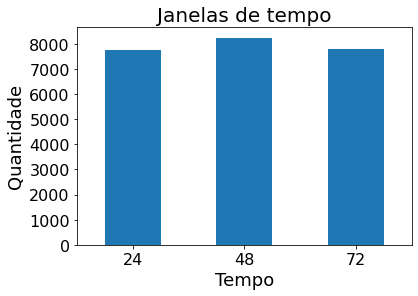

In [29]:
plt.figure()
valore_tempo = df['tempo'].value_counts(ascending=True)
ax = valore_tempo.sort_index().plot.bar()
ax.set_title('Janelas de tempo', fontsize=20)
ax.set_xlabel('Tempo', fontsize=18)
ax.set_ylabel('Quantidade', fontsize=18)
plt.xticks(rotation = 0, fontsize=16)
plt.yticks(fontsize=16)
plt.show()

# Statistics, Data and Distributions

In [30]:
import seaborn as sns
sns.set()

In [31]:
mapa = {'droga': 'composto'}
df.rename(columns=mapa, inplace=True)

In [32]:
df.head()

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,...,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [33]:
df['composto'].index

RangeIndex(start=0, stop=23814, step=1)

In [35]:
cod_compostos = df['composto'].value_counts().index[:5]

In [36]:
cod_compostos

Index(['cacb2b860', '87d714366', '9f80f3f77', '8b87a7a83', '5628cb3ee'], dtype='object')

In [37]:
df.query('composto in @cod_compostos')

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,...,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
7,id_0020d0484,com_droga,48,D1,8b87a7a83,0.2711,0.5133,-0.1327,2.5950,0.6980,...,0.3230,-0.4140,0.2532,0.0513,0.8600,1.4250,0.6633,0.4562,-0.9622,0.0260
16,id_002fb9c19,com_droga,48,D1,87d714366,8.7380,0.1914,2.4380,-0.2930,3.2010,...,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-6.7840
25,id_0054388ec,com_controle,48,D1,cacb2b860,-0.6696,-0.2718,-1.2230,-0.6226,-0.7220,...,0.6171,0.6405,0.5429,0.3562,1.3290,0.5573,0.8837,0.5534,0.8976,1.0050
38,id_0079af0fb,com_controle,24,D1,cacb2b860,-0.1636,-1.8230,-0.5211,0.3054,-1.1280,...,-0.3880,-0.6828,-0.6594,-0.2043,0.3571,-0.1319,0.2187,0.0737,0.6498,-1.4820
40,id_007bfbb91,com_controle,24,D2,cacb2b860,-1.3200,-1.7340,-0.0741,1.5440,-1.8290,...,0.7412,1.0340,0.7393,1.1020,0.3786,0.2636,-0.5751,0.3362,0.8543,0.9180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23793,id_ffd26f361,com_controle,48,D2,cacb2b860,0.6008,0.2781,-0.3319,-0.8782,0.9281,...,1.2470,0.9569,-0.2065,-0.4918,0.7863,0.0504,0.8813,0.7757,-0.5272,0.7082
23802,id_fff3976bd,com_droga,24,D1,87d714366,3.2890,2.1270,0.9770,2.0490,2.3170,...,-8.6300,-8.1490,-6.2900,-8.0970,-8.7330,-2.3780,-8.4480,-4.4550,-5.7930,-3.7000
23805,id_fff6df1c5,com_droga,48,D2,5628cb3ee,1.7380,-1.2900,-0.4533,-1.1640,-0.4841,...,0.2865,0.5974,-0.2727,0.1188,1.0770,-1.0250,0.1516,0.4503,-0.6312,-0.8302
23811,id_fffc1c3f4,com_controle,48,D2,cacb2b860,0.3942,0.3756,0.3109,-0.7389,0.5505,...,0.5409,0.3755,0.7343,0.2807,0.4116,0.6422,0.2256,0.7592,0.6656,0.3808


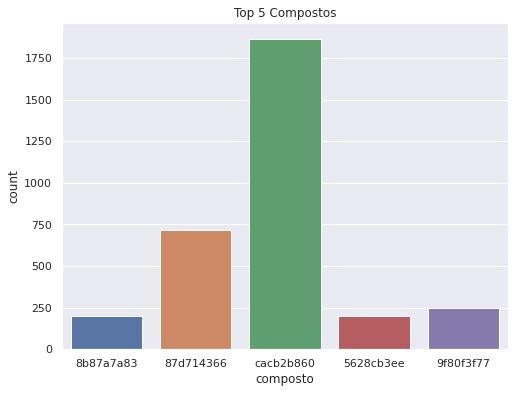

In [38]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x = 'composto', data = df.query('composto in @cod_compostos'))
ax.set_title('Top 5 Compostos')
plt.show()

In [39]:
len(df['g0'].unique())

14367

In [40]:
df['g0'].describe()

count    23814.000000
mean         0.248366
std          1.393399
min         -5.513000
25%         -0.473075
50%         -0.008850
75%          0.525700
max         10.000000
Name: g0, dtype: float64

<AxesSubplot:>

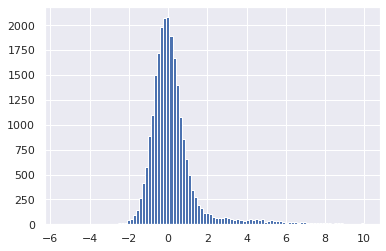

In [41]:
df['g0'].hist(bins = 100)

<AxesSubplot:>

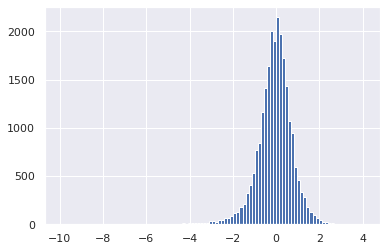

In [42]:
df['g19'].hist(bins = 100)

In [43]:
df.describe()

,tempo,g0,g1,g2,g3,g4,g5,g6,g7,g8,...,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,48.020156,0.248366,-0.095684,0.152253,0.081971,0.057347,-0.138836,0.035961,-0.202651,-0.190083,...,-0.469244,-0.461411,-0.513256,-0.500142,-0.507093,-0.353726,-0.463485,-0.378241,-0.470252,-0.301505
std,19.402807,1.393399,0.812363,1.035731,0.950012,1.032091,1.179388,0.882395,1.125494,1.749885,...,2.000488,2.042475,2.001714,2.107105,2.159589,1.629291,2.059725,1.703615,1.834828,1.407918
min,24.000000,-5.513000,-5.737000,-9.104000,-5.998000,-6.369000,-10.000000,-10.000000,-10.000000,-10.000000,...,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000
25%,24.000000,-0.473075,-0.562200,-0.437750,-0.429575,-0.470925,-0.602225,-0.493900,-0.525175,-0.511675,...,-0.566175,-0.565975,-0.589975,-0.568700,-0.563775,-0.567975,-0.552575,-0.561000,-0.592600,-0.562900
50%,48.000000,-0.008850,-0.046600,0.075200,0.008050,-0.026900,-0.015650,-0.000650,-0.017900,0.010000,...,-0.009900,0.003250,-0.009100,-0.013750,-0.003300,-0.010250,-0.001250,-0.006800,0.014000,-0.019500
75%,72.000000,0.525700,0.403075,0.663925,0.463400,0.465375,0.510425,0.528725,0.411900,0.549225,...,0.457750,0.461500,0.445675,0.452900,0.470900,0.444750,0.465225,0.446400,0.461275,0.438650
max,72.000000,10.000000,5.039000,8.257000,10.000000,10.000000,7.282000,7.333000,5.473000,8.887000,...,4.069000,3.960000,3.927000,3.596000,3.747000,2.814000,3.505000,2.924000,3.111000,3.805000


In [44]:
df[['g0', 'g1']]

,g0,g1
0,1.0620,0.5577
1,0.0743,0.4087
2,0.6280,0.5817
3,-0.5138,-0.2491
4,-0.3254,-0.4009
...,...,...
23809,0.1394,-0.0636
23810,-1.3260,0.3478
23811,0.3942,0.3756
23812,0.6660,0.2324


In [45]:
df.loc[:, 'g0':'g771'].describe().T

,count,mean,std,min,25%,50%,75%,max
g0,23814.0,0.248366,1.393399,-5.513,-0.473075,-0.00885,0.525700,10.000
g1,23814.0,-0.095684,0.812363,-5.737,-0.562200,-0.04660,0.403075,5.039
g2,23814.0,0.152253,1.035731,-9.104,-0.437750,0.07520,0.663925,8.257
g3,23814.0,0.081971,0.950012,-5.998,-0.429575,0.00805,0.463400,10.000
g4,23814.0,0.057347,1.032091,-6.369,-0.470925,-0.02690,0.465375,10.000
...,...,...,...,...,...,...,...,...
g767,23814.0,-0.076251,1.115477,-10.000,-0.506200,0.00990,0.511175,6.317
g768,23814.0,0.134162,0.951264,-4.269,-0.353100,0.00540,0.409075,10.000
g769,23814.0,-0.128018,1.230636,-10.000,-0.544600,0.00060,0.498500,5.911
g770,23814.0,-0.219210,1.326193,-10.000,-0.554400,0.02870,0.496400,10.000


<AxesSubplot:>

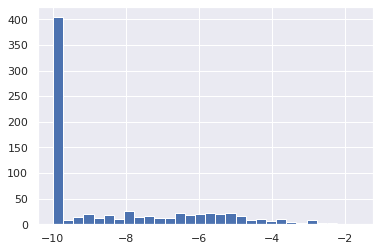

In [46]:
df.loc[:, 'g0':'g771'].describe().T['min'].hist(bins = 30)

<AxesSubplot:>

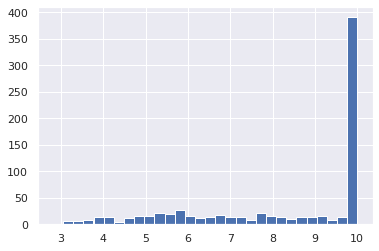

In [47]:
df.loc[:, 'g0':'g771'].describe().T['max'].hist(bins = 30)

<AxesSubplot:>

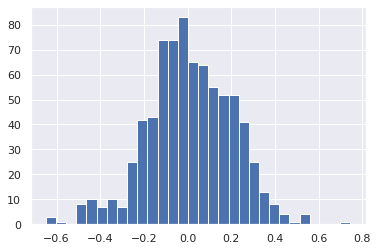

In [48]:
df.loc[:, 'g0':'g771'].describe().T['mean'].hist(bins = 30)

<AxesSubplot:xlabel='g0'>

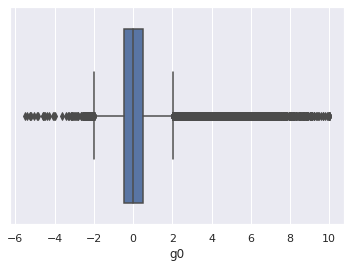

In [49]:
sns.boxplot(x='g0' , data=df)

<AxesSubplot:xlabel='tratamento', ylabel='g0'>

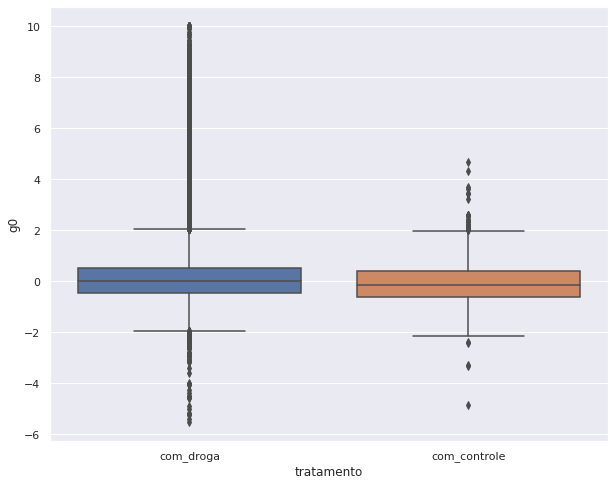

In [50]:
plt.figure(figsize=(10,8))
sns.boxplot(y='g0', x='tratamento' , data=df)

# Challenge 01: Sort the countplot graph

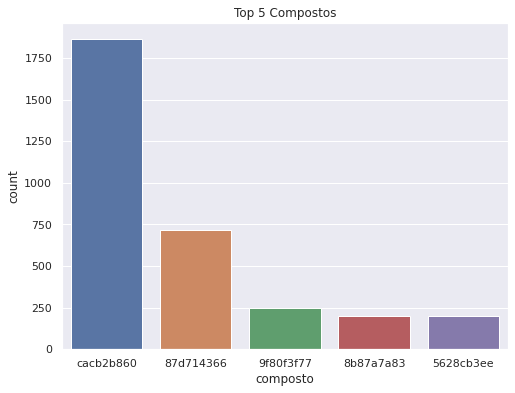

In [51]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x = 'composto', data = df.query('composto in @cod_compostos'), order = cod_compostos)
ax.set_title('Top 5 Compostos')
plt.show()

# Challenge 02: Improve visualization by changing font size...

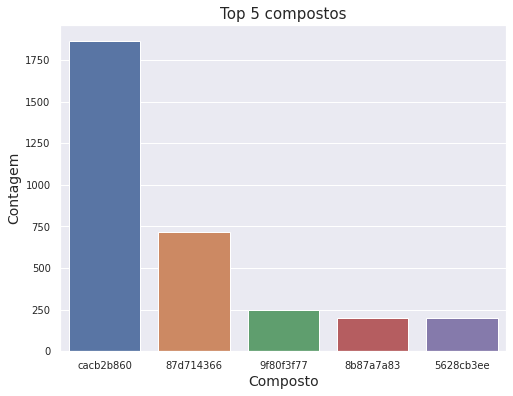

In [52]:
plt.rc('axes', titlesize = 15, labelsize = 14)
plt.rc(['xtick', 'ytick'], labelsize = 10)
plt.figure(figsize=(8, 6))
ax = sns.countplot(x = 'composto', data=df.query('composto in @cod_compostos'), order = cod_compostos)
ax.set_title('Top 5 compostos')
ax.set_ylabel('Contagem')
ax.set_xlabel('Composto')
plt.show()

# Challenge 03: Plot the histograms with seaborn

<AxesSubplot:xlabel='g0', ylabel='Count'>

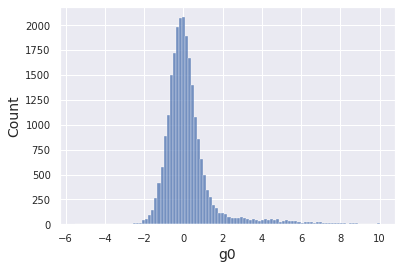

In [53]:
sns.histplot(data = df['g0'], bins = 100)

<AxesSubplot:xlabel='g19', ylabel='Count'>

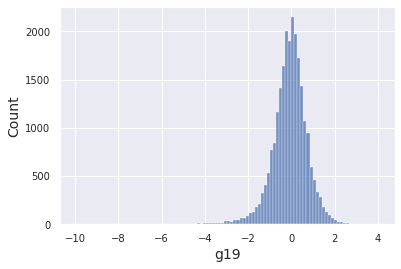

In [54]:
sns.histplot(data = df['g19'], bins = 100)

<AxesSubplot:xlabel='min', ylabel='Count'>

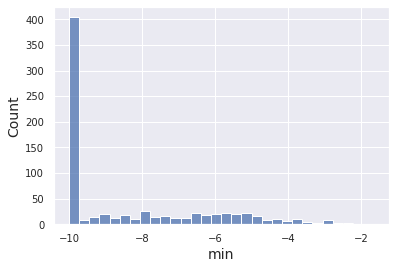

In [55]:
sns.histplot(data = df.loc[:,'g0':'g771'].describe().T['min'], bins = 30)

<AxesSubplot:xlabel='max', ylabel='Count'>

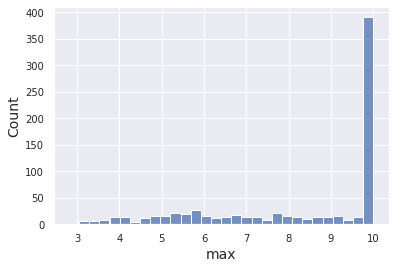

In [56]:
sns.histplot(data = df.loc[:,'g0':'g771'].describe().T['max'], bins = 30)

<AxesSubplot:xlabel='mean', ylabel='Count'>

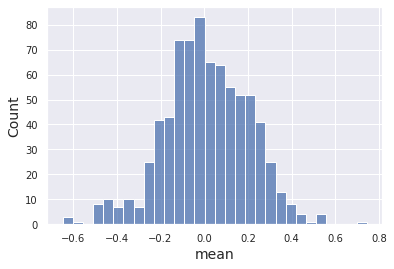

In [57]:
sns.histplot(data = df.loc[:,'g0':'g771'].describe().T['mean'], bins = 30)

# Challenge 04: Study about the statistics returned in .describe()
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

Challenge 05: Reflect on manipulation of the size of views.

https://www.alura.com.br/artigos/visualizando-informacoes-com-um-grafico

# Challenge 06: Do other analyzes with the boxplot and even the histogram.

<AxesSubplot:xlabel='dose', ylabel='g0'>

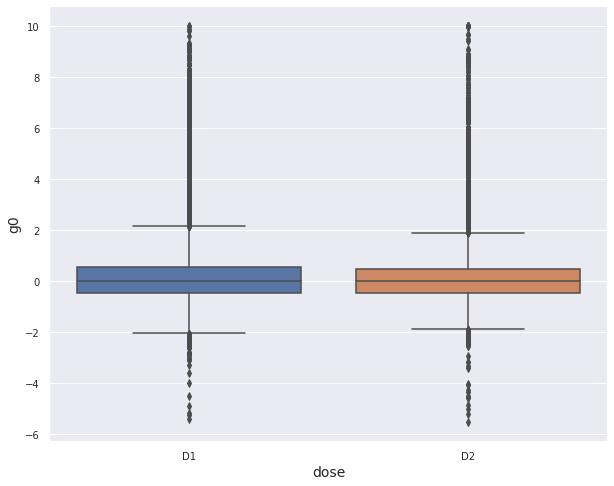

In [58]:
plt.figure(figsize=(10,8))
sns.boxplot(y = 'g0', x = 'dose' , data = df)

<AxesSubplot:xlabel='dose', ylabel='c0'>

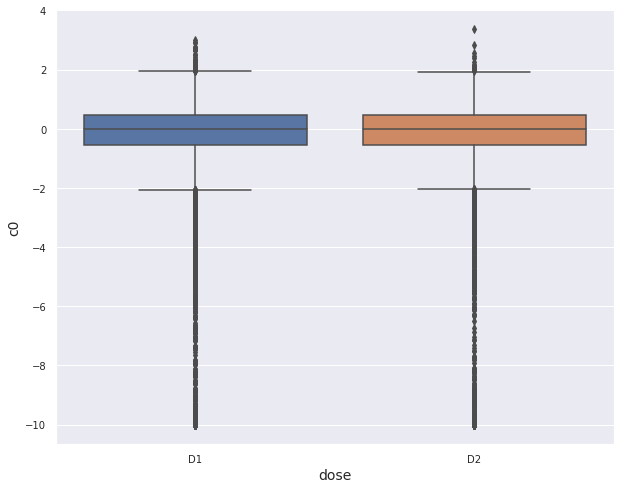

In [59]:
plt.figure(figsize=(10,8))
sns.boxplot(y = 'c0', x = 'dose' , data=df)

<AxesSubplot:xlabel='tempo', ylabel='c15'>

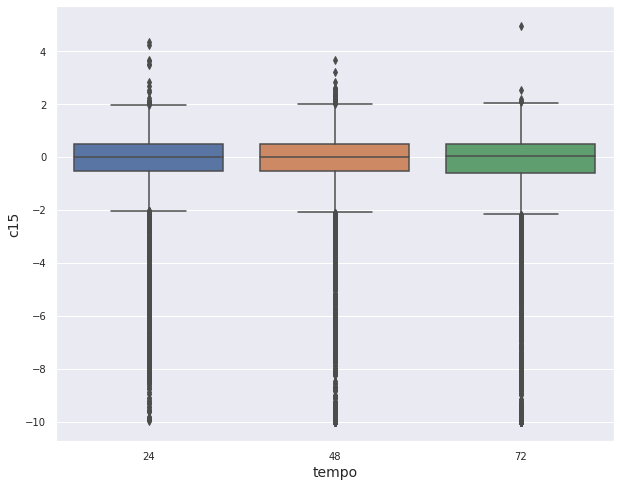

In [60]:
plt.figure(figsize=(10,8))
sns.boxplot(y='c15', x='tempo' , data=df)

<AxesSubplot:xlabel='g0', ylabel='Count'>

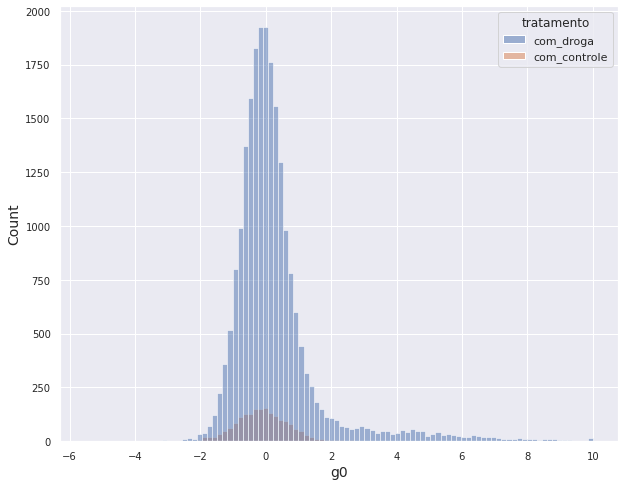

In [61]:
plt.figure(figsize=(10,8))
sns.histplot(data = df, x = 'g0', bins = 100, hue = 'tratamento')

# Correlations and causality

In [62]:
df.head()

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,...,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [63]:
pd.crosstab(df['dose'], df['tempo'])

tempo,24,48,72
dose,,,
D1,3886,4354,3907
D2,3886,3896,3885


In [64]:
pd.crosstab([df['dose'], df['tempo']], df['tratamento'], normalize = True)

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.012640   0.150542
     48         0.014403   0.168430
     72         0.012892   0.151172
D2   24         0.012808   0.150374
     48         0.012808   0.150794
     72         0.012808   0.150332

In [65]:
pd.crosstab([df['dose'], df['tempo']], df['tratamento'], normalize = 'index')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.077458   0.922542
     48         0.078778   0.921222
     72         0.078577   0.921423
D2   24         0.078487   0.921513
     48         0.078285   0.921715
     72         0.078507   0.921493

In [66]:
pd.crosstab([df['dose'], df['tempo']], df['tratamento'], values = df['g0'], aggfunc = 'mean')

tratamento  com_controle  com_droga
dose tempo                         
D1   24        -0.251760   0.367996
     48        -0.122773   0.412469
     72        -0.295271   0.286250
D2   24         0.010754   0.115253
     48         0.013174   0.214480
     72         0.070250   0.253439

<AxesSubplot:xlabel='g0', ylabel='g3'>

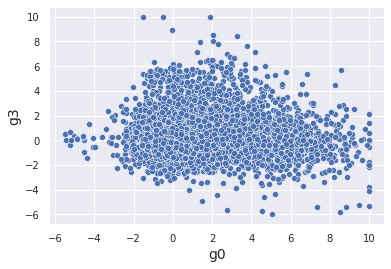

In [67]:
sns.scatterplot(x = 'g0', y = 'g3', data = df)

In [68]:
df[['g0', 'g3']]

,g0,g3
0,1.0620,-0.6208
1,0.0743,0.0604
2,0.6280,-0.0764
3,-0.5138,0.5288
4,-0.3254,0.6919
...,...,...
23809,0.1394,-0.5080
23810,-1.3260,0.9905
23811,0.3942,-0.7389
23812,0.6660,0.2044


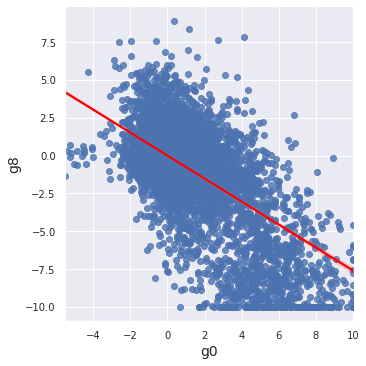

In [69]:
sns.lmplot(x = 'g0', y = 'g8', data = df, line_kws = {'color': 'red'})

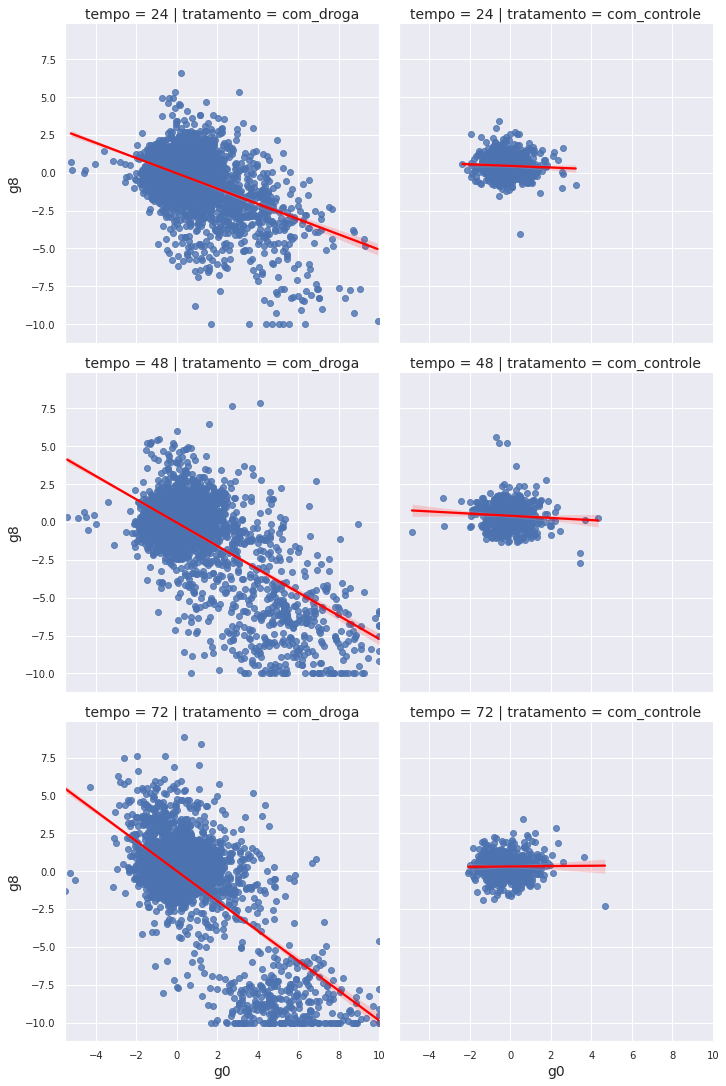

In [70]:
sns.lmplot(x = 'g0', y = 'g8', data = df, line_kws = {'color': 'red'}, col = 'tratamento', row = 'tempo')

In [71]:
df.loc[:, 'g0':'g771'].corr()

,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,...,g762,g763,g764,g765,g766,g767,g768,g769,g770,g771
g0,1.000000,0.086032,0.176188,0.011266,0.403153,-0.165478,0.238348,-0.374451,-0.604212,-0.428779,...,0.005085,-0.239410,0.548401,0.425222,-0.308095,-0.052622,0.300241,-0.127375,-0.514201,0.405908
g1,0.086032,1.000000,-0.054518,-0.027855,0.193647,-0.151590,-0.122541,0.144537,-0.009973,-0.047558,...,-0.205998,0.060051,0.115071,0.160140,0.015098,-0.003378,-0.030756,-0.006866,-0.095108,-0.032233
g2,0.176188,-0.054518,1.000000,0.042633,0.013968,0.018516,0.015190,-0.144205,-0.128029,-0.081332,...,0.090115,-0.055655,0.138085,0.061574,-0.093631,-0.053149,0.115415,0.014489,-0.078661,0.103985
g3,0.011266,-0.027855,0.042633,1.000000,-0.033039,0.042231,-0.043177,-0.175692,-0.086167,-0.014052,...,0.075982,0.178422,0.016467,-0.089317,-0.166426,-0.179370,0.028452,-0.206077,-0.002142,0.058219
g4,0.403153,0.193647,0.013968,-0.033039,1.000000,-0.057449,0.206405,-0.032748,-0.474828,-0.274167,...,-0.023752,-0.164868,0.404440,0.317500,-0.225094,0.124425,0.115579,-0.172727,-0.363673,0.250713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
g767,-0.052622,-0.003378,-0.053149,-0.179370,0.124425,-0.081016,-0.000886,0.137336,-0.101191,-0.013157,...,-0.010391,-0.180252,0.003976,-0.027425,0.153722,1.000000,-0.048393,0.065450,0.008603,-0.001136
g768,0.300241,-0.030756,0.115415,0.028452,0.115579,-0.139000,-0.005791,-0.419437,-0.209968,-0.291836,...,0.077292,0.000048,0.403211,0.241509,-0.250512,-0.048393,1.000000,0.079364,-0.382607,0.351651
g769,-0.127375,-0.006866,0.014489,-0.206077,-0.172727,-0.068537,-0.278587,-0.082554,0.268571,0.037013,...,0.020662,0.071082,0.013235,0.021152,0.151940,0.065450,0.079364,1.000000,0.135853,-0.083713
g770,-0.514201,-0.095108,-0.078661,-0.002142,-0.363673,0.144631,-0.143428,0.402451,0.441011,0.415967,...,0.014331,-0.010849,-0.498222,-0.489116,0.284882,0.008603,-0.382607,0.135853,1.000000,-0.425063


In [72]:
corr = df.loc[:, 'g0':'g50'].corr()

<AxesSubplot:>

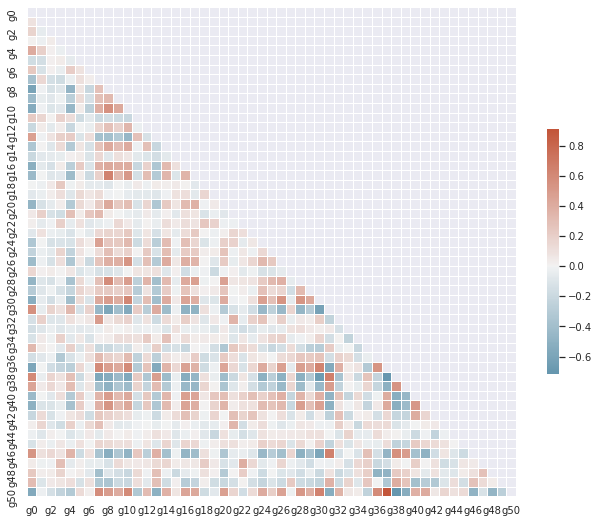

In [73]:
import numpy as np


# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [74]:
corr_celular = df.loc[:,'c0':'c50'].corr()

<AxesSubplot:>

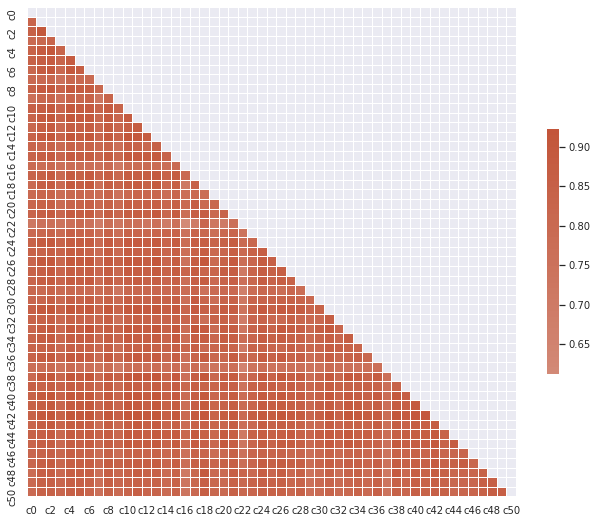

In [75]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_celular, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_celular, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Challenge 01: Create frequency tables with pandas.groupby()

In [76]:
com_droga = df[df['tratamento']=='com_droga'].groupby(['dose','tempo']).count()['tratamento']
com_droga

dose  tempo
D1    24       3585
      48       4011
      72       3600
D2    24       3581
      48       3591
      72       3580
Name: tratamento, dtype: int64

In [77]:
com_controle = df[df['tratamento']=='com_controle'].groupby(['dose','tempo']).count()['tratamento']
com_controle

dose  tempo
D1    24       301
      48       343
      72       307
D2    24       305
      48       305
      72       305
Name: tratamento, dtype: int64

In [78]:
concatenado = pd.concat([com_controle, com_droga], axis=1)
concatenado

tratamento  tratamento
dose tempo                        
D1   24            301        3585
     48            343        4011
     72            307        3600
D2   24            305        3581
     48            305        3591
     72            305        3580

In [79]:
concatenado.columns = ['com_controle', 'com_droga'] 
concatenado

com_controle  com_droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580

In [80]:
concatenado.div(concatenado.sum(axis=1),axis=0)

com_controle  com_droga
dose tempo                         
D1   24         0.077458   0.922542
     48         0.078778   0.921222
     72         0.078577   0.921423
D2   24         0.078487   0.921513
     48         0.078285   0.921715
     72         0.078507   0.921493

# Challenge 02: Normalize the crosstab by column.

In [81]:
pd.crosstab([df['dose'], df['tempo']], df['tratamento'], normalize = 'columns')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.161308   0.163341
     48         0.183816   0.182750
     72         0.164523   0.164024
D2   24         0.163451   0.163158
     48         0.163451   0.163614
     72         0.163451   0.163113

# Challenge 03: Explore other aggregators

In [82]:
pd.crosstab([df['dose'], df['tempo']], df['tratamento'], values = df['g0'], aggfunc = 'min')

tratamento  com_controle  com_droga
dose tempo                         
D1   24           -2.370     -5.183
     48           -3.276     -5.420
     72           -2.086     -5.261
D2   24           -2.135     -5.233
     48           -4.859     -4.567
     72           -1.909     -5.513

In [83]:
pd.crosstab([df['dose'], df['tempo']], df['tratamento'], values = df['g0'], aggfunc = 'max')

tratamento  com_controle  com_droga
dose tempo                         
D1   24            3.226      9.908
     48            3.423     10.000
     72            2.584      9.355
D2   24            2.601      7.167
     48            4.335     10.000
     72            4.670     10.000

In [84]:
pd.crosstab([df['dose'], df['tempo']], df['tratamento'], values = df['g0'], aggfunc = 'median')

tratamento  com_controle  com_droga
dose tempo                         
D1   24          -0.2912    0.02700
     48          -0.2145    0.01620
     72          -0.3655    0.02615
D2   24           0.0096   -0.02610
     48          -0.0506   -0.02960
     72           0.0528    0.00015

Challenge 04: Explore the melt.
https://pandas.pydata.org/docs/reference/api/pandas.melt.html

In [85]:
pd.melt(df, id_vars = ['dose'], value_vars = ['g0'])

,dose,variable,value
0,D1,g0,1.0620
1,D1,g0,0.0743
2,D1,g0,0.6280
3,D1,g0,-0.5138
4,D2,g0,-0.3254
...,...,...,...
23809,D2,g0,0.1394
23810,D2,g0,-1.3260
23811,D2,g0,0.3942
23812,D1,g0,0.6660


Challenge 05: Calculate and analyze the correlation between G and C. Reflect on biological effects.

In [88]:
corr = df.loc[:, 'g0':'c99'].corr()

In [89]:
corr_celular_genes = corr.loc['g0':'g25','c0':'c25']

<AxesSubplot:>

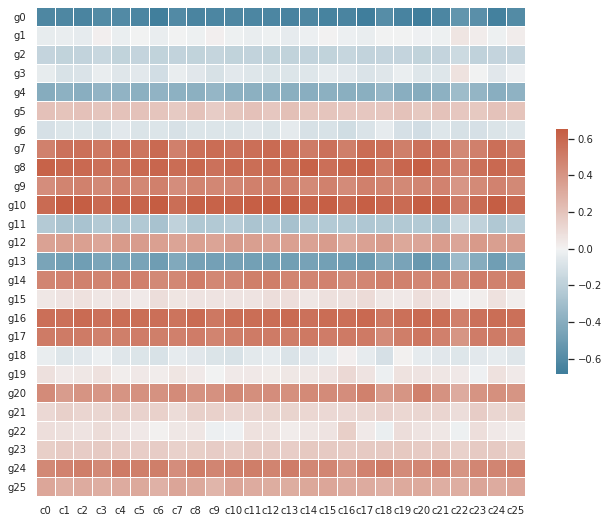

In [90]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_celular_genes, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Challenge 06: Study the code that plots the correlation matrix (heatmap)
https://seaborn.pydata.org/examples/many_pairwise_correlations.html

# Merge and Results Analysis

In [91]:
df_resultados = pd.read_csv('https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_resultados.csv?raw=true')
df_resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
df_resultados['acetylcholine_receptor_agonist'].unique()

array([0, 1])

In [93]:
df_resultados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23814 entries, 0 to 23813
Columns: 207 entries, id to wnt_inhibitor
dtypes: int64(206), object(1)
memory usage: 37.6+ MB


In [94]:
contagem_moa = df_resultados.drop('id', axis = 1).sum().sort_values(ascending = False)
contagem_moa

nfkb_inhibitor                                832
proteasome_inhibitor                          726
cyclooxygenase_inhibitor                      435
dopamine_receptor_antagonist                  424
serotonin_receptor_antagonist                 404
                                             ... 
elastase_inhibitor                              6
steroid                                         6
atm_kinase_inhibitor                            6
erbb2_inhibitor                                 1
atp-sensitive_potassium_channel_antagonist      1
Length: 206, dtype: int64

In [95]:
df_resultados.drop('id', axis = 1).sum(axis = 1)

0        1
1        0
2        3
3        0
4        1
        ..
23809    1
23810    1
23811    0
23812    1
23813    0
Length: 23814, dtype: int64

In [96]:
df_resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
df.head()

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,...,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [98]:
df_resultados['n_moa'] = df_resultados.drop('id', axis=1).sum(axis=1)

In [99]:
df_resultados['n_moa'] != 0

0         True
1        False
2         True
3        False
4         True
         ...  
23809     True
23810     True
23811    False
23812     True
23813    False
Name: n_moa, Length: 23814, dtype: bool

In [100]:
df_resultados['ativo_moa'] = (df_resultados['n_moa'] != 0)
df_resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,n_moa,ativo_moa
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,True
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,True
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,True


In [101]:
df_combinados = pd.merge(df, df_resultados[['id','n_moa', 'ativo_moa']], on='id')
df_combinados.head()

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,...,c92,c93,c94,c95,c96,c97,c98,c99,n_moa,ativo_moa
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True


In [102]:
df_combinados.query('tratamento == "com_controle"' )['ativo_moa'].value_counts()

False    1866
Name: ativo_moa, dtype: int64

In [103]:
df_combinados.query('tratamento == "com_droga"' )['ativo_moa'].value_counts()

True     14447
False     7501
Name: ativo_moa, dtype: int64

<AxesSubplot:xlabel='composto', ylabel='g0'>

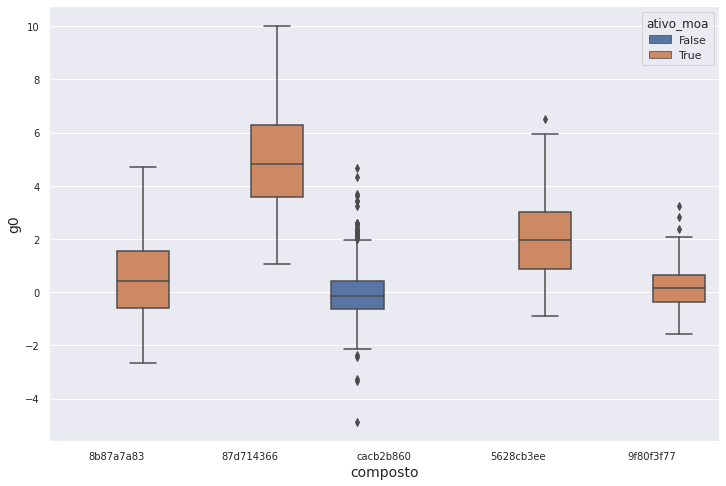

In [104]:
composto_principal = df_combinados['composto'].value_counts().index[:5]
plt.figure(figsize=(12,8))
sns.boxplot(data = df_combinados.query('composto in @composto_principal'), y= 'g0', x='composto', hue='ativo_moa')

# Challenge 01: Find the top 10 of MOA actions (inhibitor, agonist...)

In [105]:
contagem_moa.filter(like='inhibitor')[:10]

nfkb_inhibitor              832
proteasome_inhibitor        726
cyclooxygenase_inhibitor    435
dna_inhibitor               402
cdk_inhibitor               340
egfr_inhibitor              336
tubulin_inhibitor           316
pdgfr_inhibitor             297
hmgcr_inhibitor             283
flt3_inhibitor              279
dtype: int64

In [106]:
contagem_moa.filter(like='antagonist')[:10]

dopamine_receptor_antagonist         424
serotonin_receptor_antagonist        404
glutamate_receptor_antagonist        367
adrenergic_receptor_antagonist       360
acetylcholine_receptor_antagonist    301
histamine_receptor_antagonist        241
gaba_receptor_antagonist             165
cc_chemokine_receptor_antagonist     102
potassium_channel_antagonist          98
opioid_receptor_antagonist            96
dtype: int64

In [107]:
contagem_moa.filter(like='_agonist')[:10]

adrenergic_receptor_agonist        270
glucocorticoid_receptor_agonist    266
serotonin_receptor_agonist         236
acetylcholine_receptor_agonist     190
estrogen_receptor_agonist          158
dopamine_receptor_agonist          121
progesterone_receptor_agonist      119
ppar_receptor_agonist              115
gaba_receptor_agonist              106
glutamate_receptor_agonist          74
dtype: int64

# Challenge 02: Create the eh_controle column for when in the treatment line == com_controle

In [108]:
df_resultados['eh_controle'] = (df['tratamento'] == 'com_controle')
df_resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,n_moa,ativo_moa,eh_controle
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,True,False
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,False,False
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,True,False
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,False,False
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,True,False


In [109]:
df_combinados = pd.merge(df, df_resultados[['id','n_moa', 'ativo_moa','eh_controle']], on='id')
df_combinados.head()

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,...,c93,c94,c95,c96,c97,c98,c99,n_moa,ativo_moa,eh_controle
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True,False
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False,False
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True,False
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False,False
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True,False


# Challenge 03: Create three columns to indicate the time 24, 48, 72

In [110]:
Challenge 03: Create three columns to indicate the time 24, 48, 72

SyntaxError: invalid token (<ipython-input-110-f4e673bb1c69>, line 1)

In [111]:
df_resultados['24'] = (df['tempo'] == 24)
df_resultados['48'] = (df['tempo'] == 48)
df_resultados['72'] = (df['tempo'] == 72)
df_resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,n_moa,ativo_moa,eh_controle,24,48,72
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,True,False,True,False,False
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,False,False,False,False,True
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3,True,False,False,True,False
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,False,False,False,True,False
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,True,False,False,False,True


In [112]:
df_combinados = pd.merge(df, df_resultados[['id','n_moa', 'ativo_moa','eh_controle','24','48','72']], on='id')
df_combinados.head()

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,...,c96,c97,c98,c99,n_moa,ativo_moa,eh_controle,24,48,72
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,-0.3981,0.2139,0.3801,0.4176,1,True,False,True,False,False
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,0.1522,0.1241,0.6077,0.7371,0,False,False,False,False,True
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.6417,-0.2187,-1.4080,0.6931,3,True,False,False,True,False
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-1.6210,-0.8784,-0.3876,-0.8154,0,False,False,False,True,False
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.1094,0.2885,-0.3786,0.7125,1,True,False,False,False,True


In [113]:
Challenge 04: Study about DF combinations
https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

SyntaxError: invalid token (<ipython-input-113-6c0431cae710>, line 1)

# Challenge 05: Do more detailed analysis considering time and dose, to compare distributions (Choose a drug and compare with control)

In [114]:
composto_principal = df_combinados['composto'].value_counts().index[0:2]
composto_principal

Index(['cacb2b860', '87d714366'], dtype='object')

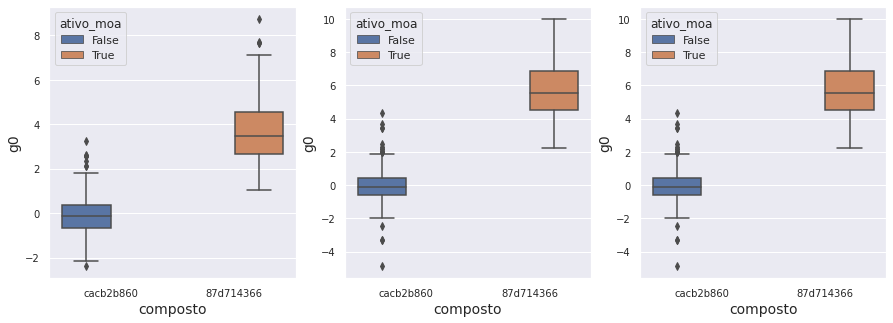

In [115]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,5))

sns.boxplot(data = df_combinados.query('composto in @composto_principal & tempo == 24'), y= 'g0', x='composto',
            hue='ativo_moa', order=composto_principal, ax=ax1)

sns.boxplot(data = df_combinados.query('composto in @composto_principal & tempo == 48'), y= 'g0', x='composto',
            hue='ativo_moa', order=composto_principal, ax=ax2)

sns.boxplot(data = df_combinados.query('composto in @composto_principal & tempo == 48'), y= 'g0', x='composto',
            hue='ativo_moa', order=composto_principal, ax=ax3)

plt.show()

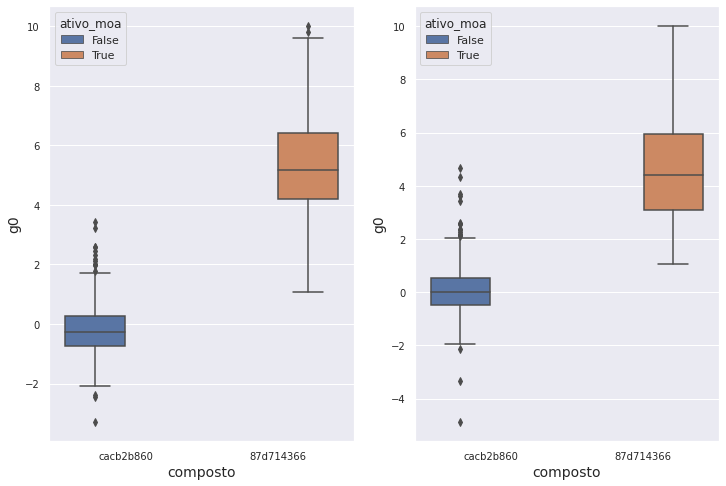

In [116]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,8))

sns.boxplot(data = df_combinados.query('composto in @composto_principal & dose == "D1"'), y= 'g0', x='composto',
            hue='ativo_moa', order=composto_principal, ax=ax1)

sns.boxplot(data = df_combinados.query('composto in @composto_principal & dose == "D2"'), y= 'g0', x='composto',
            hue='ativo_moa', order=composto_principal, ax=ax2)

plt.show()

# Challenge 06: Find out if there is any compound that, depending on the configuration of the experiment, activates or does not activate any MOA

In [117]:
df_combinados.groupby('composto').ativo_moa.mean().value_counts()

True     2076
False    1213
Name: ativo_moa, dtype: int64

# Merge and Results Analysis

In [118]:
df_combinados.head()

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,...,c96,c97,c98,c99,n_moa,ativo_moa,eh_controle,24,48,72
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,-0.3981,0.2139,0.3801,0.4176,1,True,False,True,False,False
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,0.1522,0.1241,0.6077,0.7371,0,False,False,False,False,True
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.6417,-0.2187,-1.4080,0.6931,3,True,False,False,True,False
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-1.6210,-0.8784,-0.3876,-0.8154,0,False,False,False,True,False
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.1094,0.2885,-0.3786,0.7125,1,True,False,False,False,True


In [119]:
df_resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,n_moa,ativo_moa,eh_controle,24,48,72
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,True,False,True,False,False
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,False,False,False,False,True
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3,True,False,False,True,False
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,False,False,False,True,False
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,True,False,False,False,True


In [120]:
from sklearn.model_selection import train_test_split

X = df_combinados.select_dtypes('float64')
y = df_combinados['ativo_moa']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 376)

In [121]:
from sklearn.linear_model import LogisticRegression

Model_LR = LogisticRegression(max_iter=1000)
Model_LR.fit(X_train, y_train)
Model_LR.score(X_test, y_test)

0.6264959059416334

In [122]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

Model_dummy = DummyClassifier('most_frequent')
Model_dummy.fit(X_train, y_train)
Predict_dummy = Model_dummy.predict(X_test)
accuracy_score(y_test, Predict_dummy)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass strategy=most_frequent as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


0.6067604450976275

In [123]:
df_combinados['ativo_moa'].value_counts(normalize=True)

True     0.60666
False    0.39334
Name: ativo_moa, dtype: float64

In [124]:
from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier(max_depth = 3)
DTC.fit(X_train, y_train)
DTC.score(X_test, y_test)

0.6105395758975436

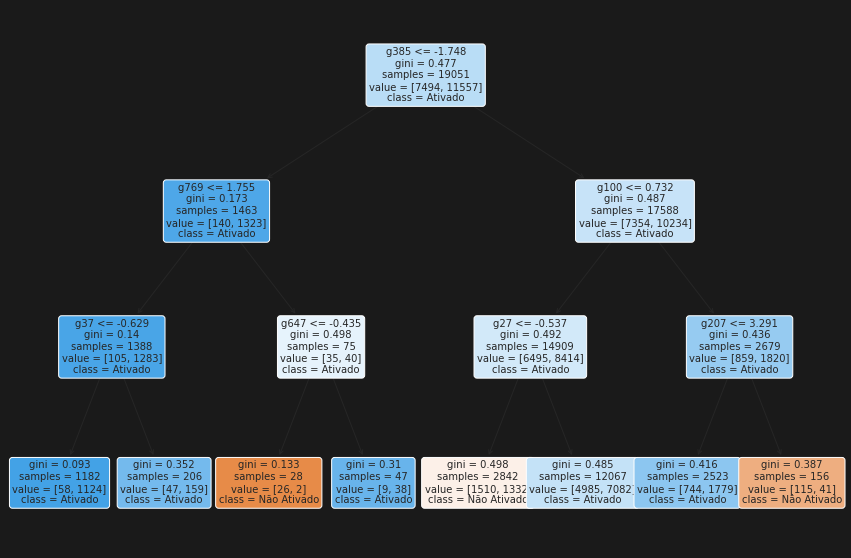

In [125]:
from sklearn import tree

fig, ax = plt.subplots(figsize=(15, 10), facecolor='k')
tree.plot_tree(DTC,
               ax=ax,
               fontsize=10,
               rounded=True,
               filled=True,
               feature_names=X_train.columns,
               class_names=['Não Ativado', 'Ativado'])

plt.show()

In [126]:
treino = []
teste = []
for i in range(1, 15):
    DTC = DecisionTreeClassifier(max_depth = i)
    DTC.fit(X_train, y_train)
    treino.append(DTC.score(X_train, y_train))
    teste.append(DTC.score(X_test, y_test))

In [127]:
treino

[0.6066348223190384,
 0.6066348223190384,
 0.6211222508004829,
 0.6360820954280615,
 0.6412261823526324,
 0.6489423127394888,
 0.6606477350270327,
 0.6707259461445594,
 0.6895176106241142,
 0.7068395359823632,
 0.7294630203138943,
 0.752926355571886,
 0.7772295417563383,
 0.7992756285759278]

In [128]:
teste

[0.6067604450976275,
 0.6067604450976275,
 0.6105395758975436,
 0.6206172580306529,
 0.6214570648750787,
 0.6176779340751627,
 0.6204073063195465,
 0.6208272097417594,
 0.614948561830779,
 0.6136888515641402,
 0.61074952760865,
 0.600881797186647,
 0.5979424732311568,
 0.5962628595423053]

<AxesSubplot:>

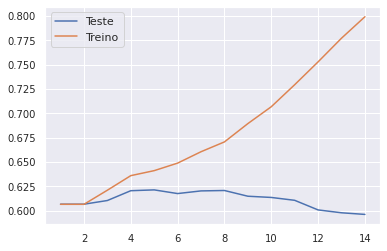

In [129]:
sns.lineplot(x = range(1, 15), y = teste, label = 'Teste')
sns.lineplot(x = range(1, 15), y = treino, label = 'Treino')

In [130]:
pd.get_dummies(df_combinados['tratamento'])

,com_controle,com_droga
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
23809,0,1
23810,0,1
23811,1,0
23812,0,1


In [131]:
pd.get_dummies(df_combinados, columns = ['tratamento', 'dose', 'tempo'])

,id,composto,g0,g1,g2,g3,g4,g5,g6,g7,...,24,48,72,tratamento_com_controle,tratamento_com_droga,dose_D1,dose_D2,tempo_24,tempo_48,tempo_72
0,id_000644bb2,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,...,True,False,False,0,1,1,0,1,0,0
1,id_000779bfc,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,...,False,False,True,0,1,1,0,0,0,1
2,id_000a6266a,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,...,False,True,False,0,1,1,0,0,1,0
3,id_0015fd391,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,...,False,True,False,0,1,1,0,0,1,0
4,id_001626bd3,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,...,False,False,True,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,...,True,False,False,0,1,0,1,1,0,0
23810,id_fffb70c0c,ecf3b6b74,-1.3260,0.3478,-0.3743,0.9905,-0.7178,0.6621,-0.2252,-0.5565,...,True,False,False,0,1,0,1,1,0,0
23811,id_fffc1c3f4,cacb2b860,0.3942,0.3756,0.3109,-0.7389,0.5505,-0.0159,-0.2541,0.1745,...,False,True,False,1,0,0,1,0,1,0
23812,id_fffcb9e7c,8b87a7a83,0.6660,0.2324,0.4392,0.2044,0.8531,-0.0343,0.0323,0.0463,...,True,False,False,0,1,1,0,1,0,0


In [132]:
df_combinados.drop(['id', 'n_moa', 'ativo_moa', 'composto'], axis = 1)

,tratamento,tempo,dose,g0,g1,g2,g3,g4,g5,g6,...,c94,c95,c96,c97,c98,c99,eh_controle,24,48,72
0,com_droga,24,D1,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,...,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,False,True,False,False
1,com_droga,72,D1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,...,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,False,False,False,True
2,com_droga,48,D1,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,...,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,False,False,True,False
3,com_droga,48,D1,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,...,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,False,False,True,False
4,com_droga,72,D2,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,...,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,com_droga,24,D2,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,...,0.5372,-0.3246,0.0631,0.9171,0.5258,0.4680,False,True,False,False
23810,com_droga,24,D2,-1.3260,0.3478,-0.3743,0.9905,-0.7178,0.6621,-0.2252,...,-0.8086,-0.9798,-0.2084,-0.1224,-0.2715,0.3689,False,True,False,False
23811,com_controle,48,D2,0.3942,0.3756,0.3109,-0.7389,0.5505,-0.0159,-0.2541,...,0.4116,0.6422,0.2256,0.7592,0.6656,0.3808,True,False,True,False
23812,com_droga,24,D1,0.6660,0.2324,0.4392,0.2044,0.8531,-0.0343,0.0323,...,1.5230,0.7101,0.1732,0.7015,-0.6290,0.0740,False,True,False,False


In [133]:
from sklearn.ensemble import RandomForestClassifier

X = df_combinados.drop(['id', 'n_moa', 'ativo_moa', 'composto'], axis = 1)
X = pd.get_dummies(X, columns = ['tratamento', 'dose', 'tempo'])
y = df_combinados['ativo_moa'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 376)

RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)
RFC.score(X_test, y_test)

0.6823430610959479

# Challenge 01: Try other models or change the parameters of models we tested in class

In [134]:
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [135]:
X = df_combinados.select_dtypes('float64')
y = df_combinados['ativo_moa']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 376)

In [136]:
XG = XGBClassifier()
XG.fit(X_train, y_train)
XG.score(X_test, y_test)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:17:01] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


0.6365735880747428

Challenge 02: Study Sklearn documentation
https://scikit-learn.org/stable/index.html

Challenge 03: Research the flowchart 'Choosing the best model' choosing 
https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

Challenge 04: Test other problems (questions). 0, 1 or +.


In [137]:
df_combinados.head(0)

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,...,c96,c97,c98,c99,n_moa,ativo_moa,eh_controle,24,48,72


In [138]:
df_combinados['dose'].value_counts()

D1    12147
D2    11667
Name: dose, dtype: int64

In [139]:
X = df_combinados.loc[:, 'g0':'c99']
y = df_combinados['dose'].map({'D1':0,'D2':1})

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 376)

In [141]:
LR2 = LogisticRegression(solver='newton-cg')
LR2.fit(X_train, y_train)
LR2.score(X_test, y_test)

0.9389040520680244

# Challenge 05: Choose the most used drug and try to create a model to predict this label

In [142]:
df_combinados['composto'].value_counts()

cacb2b860    1866
87d714366     718
9f80f3f77     246
8b87a7a83     203
5628cb3ee     202
             ... 
98c4c858e       1
758c4ac3d       1
91a585117       1
861a693e3       1
ede646bcc       1
Name: composto, Length: 3289, dtype: int64

In [143]:
X = df_combinados.loc[:, 'g0':'g10']
y = df_combinados['composto'].map({'cacb2b860': 0, '87d714366': 1})

<AxesSubplot:xlabel='count', ylabel='composto'>

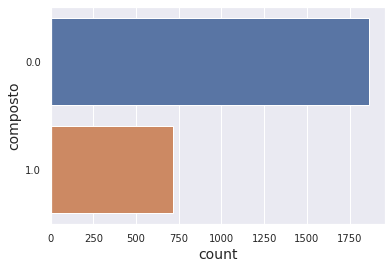

In [145]:

#unbalanced data
sns.countplot(y = y)

In [146]:
dt_query = df_combinados.query('composto in ["8b87a7a83", "5628cb3ee"]')
X = dt_query.loc[:, 'g0':'g10']
# Alterando o y
y = dt_query['composto'].map({'8b87a7a83':0, '5628cb3ee':1})

In [147]:
dt_query['composto'].value_counts()

8b87a7a83    203
5628cb3ee    202
Name: composto, dtype: int64

<AxesSubplot:xlabel='count', ylabel='composto'>

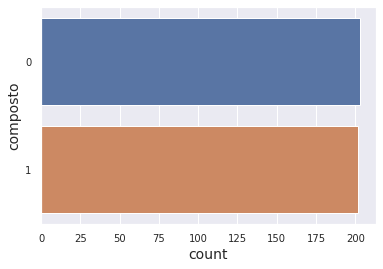

In [148]:
#Best :D
sns.countplot(y = y)

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 376)

In [150]:
MLR2 = LogisticRegression()
MLR2.fit(X_train, y_train)
MLR2.score(X_test, y_test)

0.9382716049382716